theta_best [[4.22125942]
 [2.87448259]]
y_pred: 	 [[4.22125942]
 [9.9702246 ]]


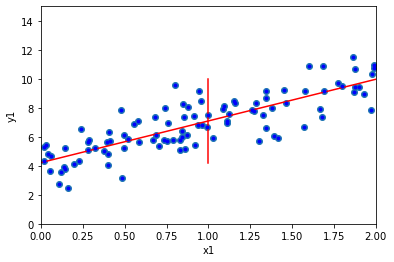

lin_rog_predict [[4.22125942]
 [9.9702246 ]]
intercept [4.26448129] coef [2.91824252]
intercept [2.0443706] coef [[1.01493312 0.49923317]]
リッジ回帰 [[1.91013275]]
L2正則化 [1.82375841]
ラッソ回帰 [1.90827281]
エラスティックネット [1.90897932]


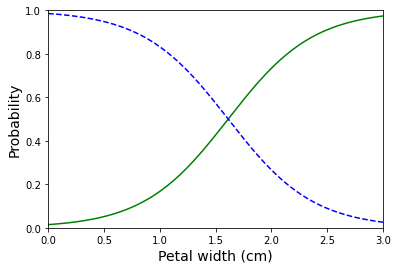

In [5]:
#線形回帰
import numpy as np
import matplotlib.pyplot as plt

X=2*np.random.rand(100,1)
Y=4+3*X+np.random.randn(100,1)
plt.scatter(X,Y)
plt.xlabel("x1")
plt.ylabel("y1")

#正規方程式
from numpy.linalg import inv
X_b=np.c_[np.ones((100,1)),X]##要素が１の列ベクトルをx0として用いる。　結果、　パラメータをその数分だけ得られる。
theta_best=inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
print("theta_best",theta_best)

#MSE=sum((theta_best.T.dot(X_b.T)-Y)**2)
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
y_pred=X_new_b.dot(theta_best)
y_pred
print("y_pred: \t", y_pred)

plt.plot(X_new_b,y_pred,"r-") #**kwargsLine2D properties, - linestyle
plt.plot(X,Y,"b.") #. point marker
plt.axis([0,2,0,15])
plt.show()

from sklearn.linear_model import LinearRegression
lin_rog=LinearRegression()
lin_rog.fit(X,Y)
lin_rog.intercept_,lin_rog.coef_
print("lin_rog_predict",lin_rog.predict(X_new))

#バッチ勾配降下
eta=0.1
n_iterations=1000
m=100

theta=np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-Y)
    theta=theta - eta*gradients
    
theta    
n_epochs=50
t0, t1=5,50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=Y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients
        
theta  

#確率的勾配降下
from sklearn.linear_model import SGDRegressor
sgd_reg= SGDRegressor(max_iter=50,tol=-np.infty,penalty=None,eta0=0.1)
sgd_reg.fit(X,Y.ravel())

intercept,coef = sgd_reg.intercept_, sgd_reg.coef_
print("intercept",intercept,"coef",coef)
m=100
X=6*np.random.randn(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

#多項式回帰
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2, include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0],X_poly[0]
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
s,t = lin_reg.intercept_, lin_reg.coef_

print("intercept",s,"coef",t)

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#学習率
def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val=train_test_split(X,y,test_size=0.2)
    train_errors, val_errors=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_pred=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_pred,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val))
    plt.plot(np.sqrt(train_errors),"r--",linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors), "b-",linewidth=3,label="val")
    
lin_reg=LinearRegression()
#plot_learning_curves(lin_reg,X,y)

from sklearn.pipeline import Pipeline
polynomial_regression=Pipeline([
    ("poly_features",PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg",LinearRegression()),
])

#plot_learning_curves(polynomial_regression,X,y)
plt.axis([0, 80, 0, 3]) 

m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

#正則化つき回帰　Ridge
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg = ridge_reg.predict([[1.5]])
print("リッジ回帰", ridge_reg)

sgd_reg=SGDRegressor(max_iter=50,tol=-np.infty,penalty="L2")
sgd_reg.fit(X,y.ravel())
sgd_reg = sgd_reg.predict([[1.5]])
print("L2正則化",sgd_reg)

#正則化付き回帰　Lasso
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg = lasso_reg.predict([[1.5]])
print("ラッソ回帰",lasso_reg)
#elasticnet net
from sklearn.linear_model import ElasticNet
erastic_reg=ElasticNet(alpha=0.1,l1_ratio=0.5)
erastic_reg.fit(X,y)
erastic_reg = erastic_reg.predict([[1.5]])
print("エラスティックネット",erastic_reg)

from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
poly_scaler=Pipeline([
    ("poly_feature",PolynomialFeatures(degree=90,include_bias=False)),
    ("std_scaler",StandardScaler())
])
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
X_train_poly_scaled=poly_scaler.fit_transform(X_train)
X_val_poly_scaled=poly_scaler.transform(X_val)
sgd_reg=SGDRegressor(max_iter=1,tol=-np.infty,penalty=None,learning_rate="constant",eta0=0.0005)

minimun_val_error=float("inf")
best_epoch=None
best_model=None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train.ravel())
    y_val_predict=sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimun_val_error:
        minimun_val_error=val_error
        best_epoch=epoch
        best_model=clone(sgd_reg)

        
        
#irisデータに線形回帰適応        
from sklearn import datasets
iris=datasets.load_iris()
list(iris.keys())
X=  iris["data"][:, 3:]
y=(iris["target"]==2).astype(np.int) 

#ロジスティック回帰
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X,y)
X_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-Virginica")
plt.axis([0,3,0,1])
plt.xlabel("Petal width (cm)",fontsize=14)
plt.ylabel("Probability",fontsize=14)

log_reg.predict([[1.7],[1.5]])

X=iris["data"][:,(2,3)]
y=iris["target"]

#irisにソフトマックス回帰適応
softmax_reg=LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10)
softmax_reg.fit(X,y)
softmax_reg.predict([[5,2]])
softmax = softmax_reg.predict_proba([[5,2]])





        